In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#pd.set_option('display.max_rows',None)
df=pd.read_csv('C:/Users/maaza/PorfolioProject/movies.csv')
df=df.sort_values(["gross"],ascending=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


### Data Cleaning

##### Checking for empty or NaN rows in our data

In [3]:

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} : {}%'.format(col,pct_missing))


name : 0.0%
rating : 0.010041731872717789%
genre : 0.0%
year : 0.0%
released : 0.0002608242044861763%
score : 0.0003912363067292645%
votes : 0.0003912363067292645%
director : 0.0%
writer : 0.0003912363067292645%
star : 0.00013041210224308815%
country : 0.0003912363067292645%
budget : 0.2831246739697444%
gross : 0.02464788732394366%
company : 0.002217005738132499%
runtime : 0.0005216484089723526%


##### Extracting release year from the released column in a seperate dataframe and then putting it in the main dataframe with the the name "Year"


In [4]:
#extracting realease year from the released column
new=df['released'].astype(str).str.split(", ",n=1,expand=True)
Year=new[1].astype(str).str.split("(",n=1,expand=True)
Year=Year[0].astype(str).str.split(" ",n=1,expand=True)
Year=Year[0]
df['Year']=Year

#Convert non null integer like strings to integer and convert None values to NaN

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year']=df['Year'].astype('Int64')


##### Dropping NaN and empty rows from the dataframe and also dropping duplicates from the table

In [5]:
df.dropna(inplace=True)
df=df.drop_duplicates()

##### Checking for the missing values again. This time all of the missing values will be gone.

In [6]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} : {}%'.format(col,pct_missing))


name : 0.0%
rating : 0.0%
genre : 0.0%
year : 0.0%
released : 0.0%
score : 0.0%
votes : 0.0%
director : 0.0%
writer : 0.0%
star : 0.0%
country : 0.0%
budget : 0.0%
gross : 0.0%
company : 0.0%
runtime : 0.0%
Year : 0.0%


##### Checking the datatypes of the columns in the table

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
Year          Int64
dtype: object

##### Changing the datatypes of all the float values that can be changed to integer.

In [8]:
dtype_convert_dict={
    'budget':int,
    'votes':int,
    'runtime':int,
    'Year':int
}
df=df.astype(dtype_convert_dict)
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int32
director     object
writer       object
star         object
country      object
budget        int32
gross       float64
company      object
runtime       int32
Year          int32
dtype: object

### Data Analysis

####  Creating another dataframe from the original one and use it to check for correlation among the numeric variables.

In [9]:
df1=pd.DataFrame(df,columns=['score','budget','votes','runtime','Year','gross'])

#### Plotting

##### Check for linear relationship between gross earnings and the other numeric factors. We need to see that which factors have the best fit with gross earning of the movies.

In [10]:
#plt.scatter(x=df['budget'],y=df['gross'])
#plt.title('Movie Earnings From Budget Spent')
#plt.xlabel('Movie Budget')
#plt.ylabel('Movie Earnings')
#plt.show()

<Axes: xlabel='runtime', ylabel='gross'>

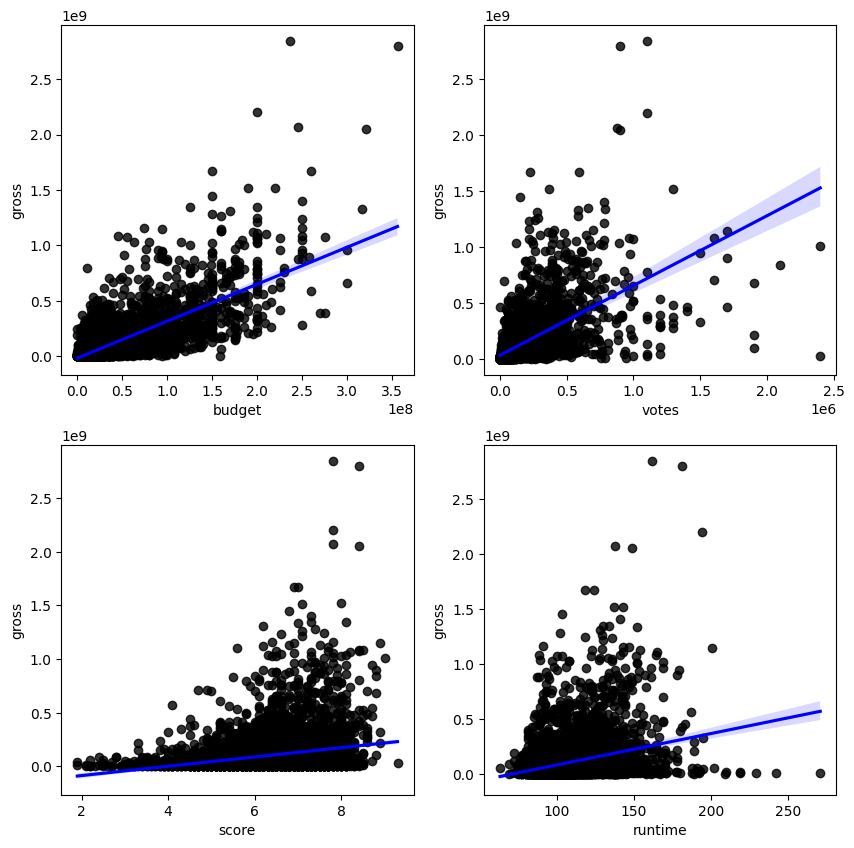

In [11]:
fig, axes=plt.subplots(2,2,figsize=(10,10))
sns.regplot(x=df['budget'],y=df['gross'],scatter_kws={"color":"Black"},line_kws={"color":"Blue"},ax=axes[0,0])
sns.regplot(x=df['votes'],y=df['gross'],scatter_kws={"color":"Black"},line_kws={"color":"Blue"},ax=axes[0,1])
sns.regplot(x=df['score'],y=df['gross'],scatter_kws={"color":"Black"},line_kws={"color":"Blue"},ax=axes[1,0])
sns.regplot(x=df['runtime'],y=df['gross'],scatter_kws={"color":"Black"},line_kws={"color":"Blue"},ax=axes[1,1])



##### As it can be seen from the plots that budget and votes have the best fit line against gross earnings among the four factors.

##### Creating correlation table among the table variables to reaffirm our claim.

In [12]:
cor=df1.corr()
cor

,score,budget,votes,runtime,Year,gross
score,1.000000,0.071552,0.474594,0.414501,0.061443,0.222504
budget,0.071552,1.000000,0.439077,0.318353,0.319669,0.740028
votes,0.474594,0.439077,1.000000,0.352263,0.202215,0.614432
runtime,0.414501,0.318353,0.352263,1.000000,0.075183,0.275641
Year,0.061443,0.319669,0.202215,0.075183,1.000000,0.268141
gross,0.222504,0.740028,0.614432,0.275641,0.268141,1.000000


##### Plotting the correlation matrix.

Text(145.72222222222223, 0.5, 'Movie Features')

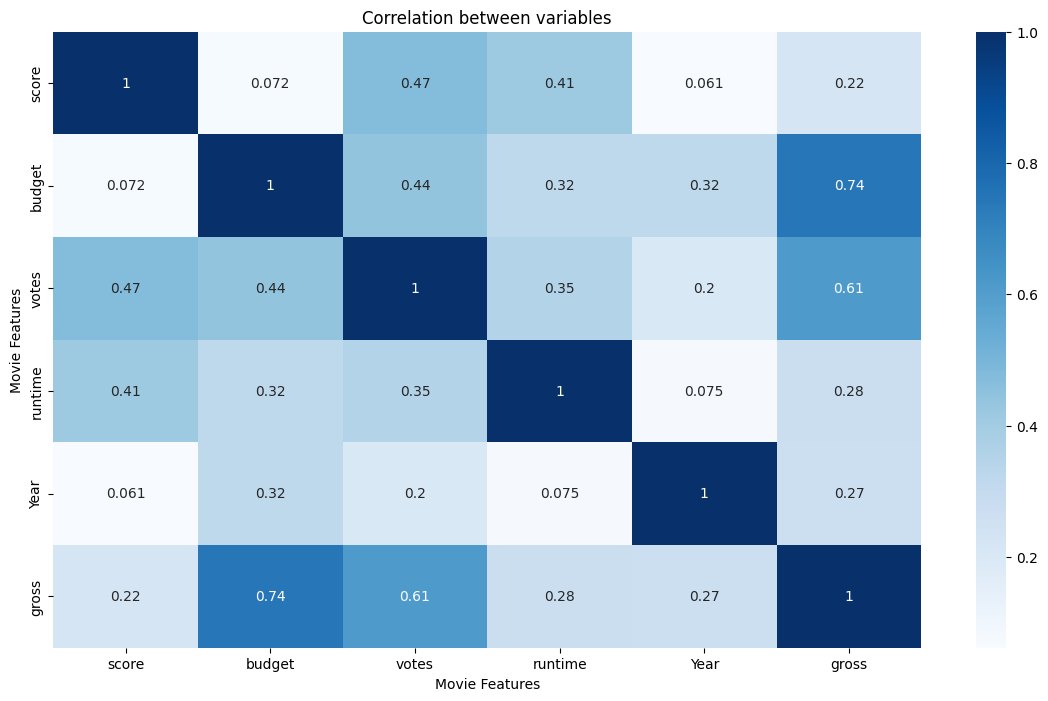

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(cor,annot=True,cmap='Blues')
plt.title('Correlation between variables')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

##### As it can be seen from the above correlation matrix that budget and votes have highest correlation with gross earnings. Which means that gross earnings depend on the budget and the votes.

##### Converting object datatypes in the dataframe into categorical datatypes so it can be used for correlation with other variables. Main focus is to check if there is a correlation between company and gross earnings. Means does the company affects the gross earnings or not.

In [14]:
df_numerized=df
for i in df_numerized.columns:
    if (df_numerized[i].dtype=="object"):
        df_numerized[i]=df_numerized[i].astype('category')
        df_numerized[i]=df_numerized[i].cat.codes




In [15]:
df_numerized=df_numerized.drop(["released","year"], axis=1)
df_numerized

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,386,5,0,7.8,1100000,781,1260,1527,47,237000000,2.847246e+09,1376,162,2009
7445,388,5,0,8.4,903000,105,510,1463,47,356000000,2.797501e+09,978,181,2019
3045,4895,5,6,7.8,1100000,781,1260,1067,47,200000000,2.201647e+09,1376,194,1997
6663,3632,5,0,7.8,876000,765,1803,355,47,245000000,2.069522e+09,940,138,2015
7244,389,5,0,8.4,897000,105,510,1463,47,321000000,2.048360e+09,978,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3782,6,6,5.8,3500,583,2920,1491,47,3000000,5.073000e+03,1379,96,2015
2434,2958,5,0,4.5,1900,1801,3097,185,47,5000000,2.970000e+03,1370,97,1994
3681,1589,3,6,6.8,43000,948,1680,524,6,5000000,2.554000e+03,462,108,2001
272,2898,6,9,3.9,2300,261,54,1466,47,800000,2.270000e+03,578,85,1982


##### Applying correlation function on all the variables

In [16]:
corr=df_numerized.corr()
corr

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.029220,0.010840,0.013644,0.012264,0.014687,0.012449,-0.006846,-0.025192,0.022954,0.005278,0.021215,0.011083,0.025485
rating,-0.029220,1.000000,0.148529,0.066535,0.006652,0.014283,-0.002375,0.010629,0.009889,-0.203553,-0.181739,-0.092134,0.142450,0.022089
genre,0.010840,0.148529,1.000000,0.035158,-0.134986,-0.009275,0.016506,0.003601,-0.008617,-0.368226,-0.243547,-0.071046,-0.059148,-0.066049
score,0.013644,0.066535,0.035158,1.000000,0.474594,0.006557,0.014493,0.007886,-0.042119,0.071552,0.222504,0.020800,0.414501,0.061443
votes,0.012264,0.006652,-0.134986,0.474594,1.000000,-0.010430,-0.005376,-0.018099,0.041409,0.439077,0.614432,0.117717,0.352263,0.202215
director,0.014687,0.014283,-0.009275,0.006557,-0.010430,1.000000,0.259625,0.035932,0.011458,-0.009708,-0.029676,-0.009179,0.018158,-0.036274
writer,0.012449,-0.002375,0.016506,0.014493,-0.005376,0.259625,1.000000,0.017183,0.022269,-0.039757,-0.036044,-0.004835,-0.017491,-0.024065
star,-0.006846,0.010629,0.003601,0.007886,-0.018099,0.035932,0.017183,1.000000,-0.011115,-0.022185,-0.000420,0.013621,0.009753,-0.032943
country,-0.025192,0.009889,-0.008617,-0.042119,0.041409,0.011458,0.022269,-0.011115,1.000000,0.052579,0.059910,0.047912,-0.035499,-0.074050
budget,0.022954,-0.203553,-0.368226,0.071552,0.439077,-0.009708,-0.039757,-0.022185,0.052579,1.000000,0.740028,0.169168,0.318353,0.319669


##### Correlation Heatmap

Text(158.22222222222223, 0.5, 'Movie Features')

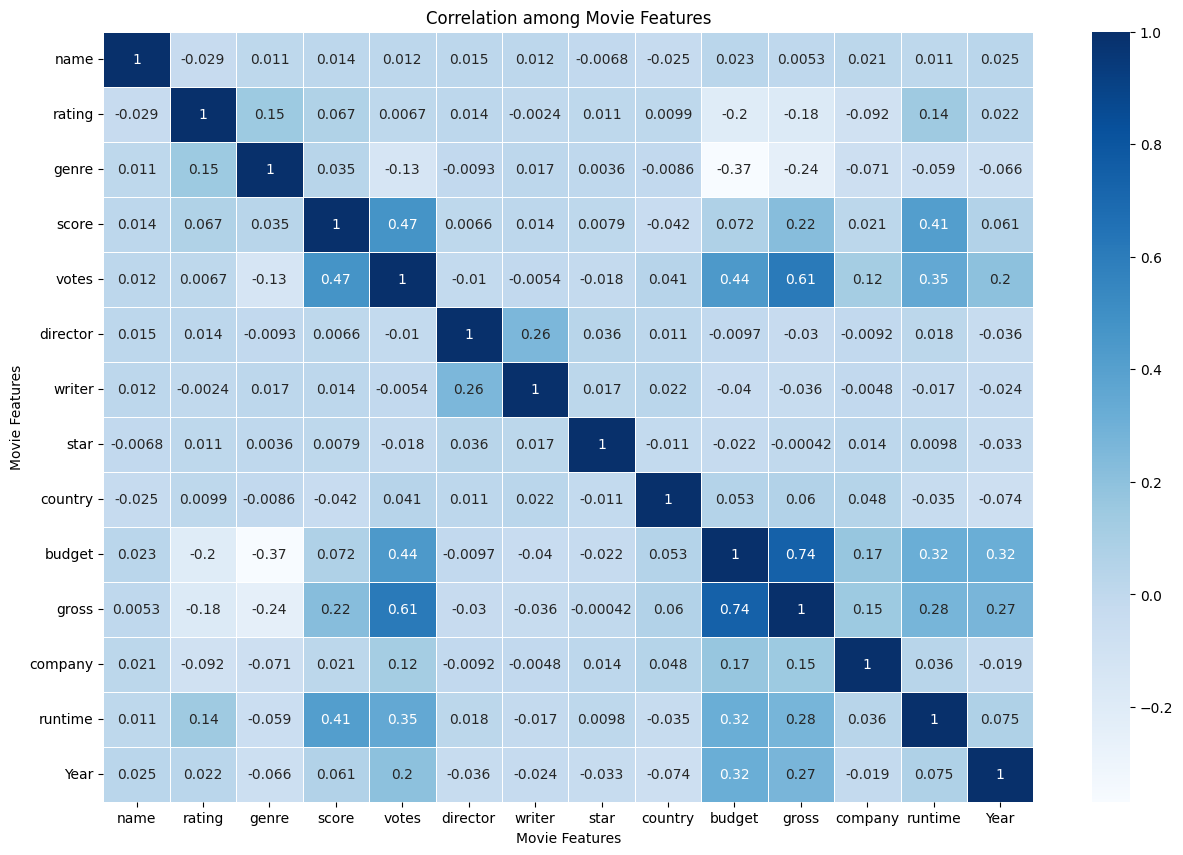

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="Blues",linewidths=.5, ax=ax)
plt.title('Correlation among Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


##### Filtering the correlation values greater then 0.5

In [18]:
unstack_corr=corr.unstack()
pairs_corr=unstack_corr.sort_values()
high_corr=pairs_corr[(pairs_corr)>.5]
high_corr

votes     gross       0.614432
gross     votes       0.614432
budget    gross       0.740028
gross     budget      0.740028
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
Year      Year        1.000000
dtype: float64

##### So technically if the correlation is in between .5 and 1 then the correlation is high. As it can be seen from the correlation heatmap that budget and votes have the highest correlation with the earning and companies correlation with the movie earnings is not that high.  